connected to broker  localhost
subscribing to unibo/qak/events
msg(g521,event,rasp,none,g521(accel,0.169988317871,0.383072265625,8.90164177246),1) msgnum= 1


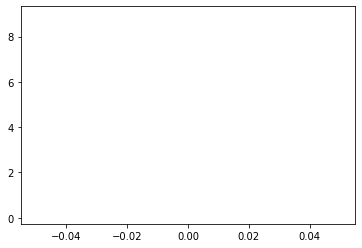

msg(g521,event,rasp,none,g521(accel,0.215478149414,0.3064578125,9.12909093018),2) msgnum= 2


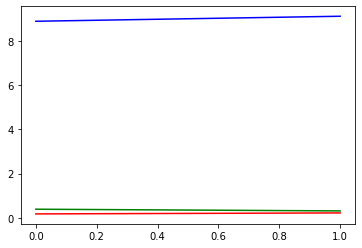

msg(g521,event,rasp,none,g521(accel,0.205901342773,0.428562097168,8.93037219238),3) msgnum= 3


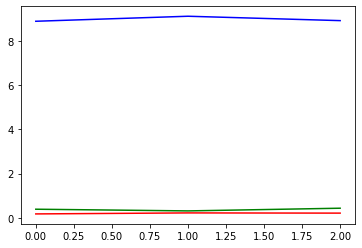

msg(g521,event,rasp,none,g521(accel,0.258573779297,0.287304199219,9.10993731689),4) msgnum= 4


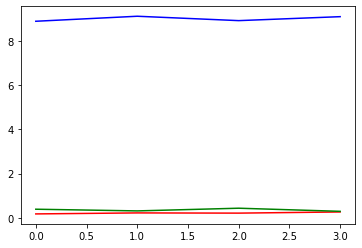

msg(g521,event,rasp,none,g521(accel,0.177170922852,0.371101257324,9.05965908203),5) msgnum= 5


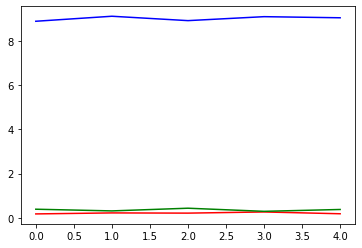

msg(g521,event,rasp,none,g521(accel,0.179565124512,0.366312854004,9.00219824219),6) msgnum= 6


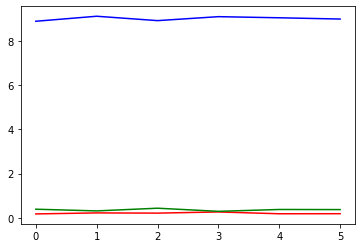

msg(g521,event,rasp,none,g521(accel,0.177170922852,0.325611425781,9.08838950195),7) msgnum= 7


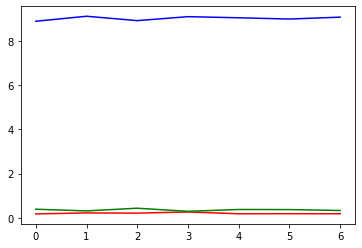

msg(g521,event,rasp,none,g521(accel,0.141257897949,0.438138903809,8.8992475708),8) msgnum= 8


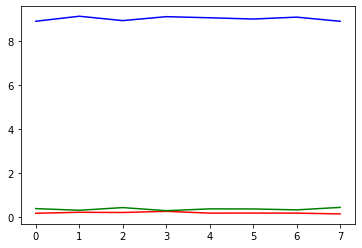

msg(g521,event,rasp,none,g521(accel,0.220266552734,0.361524450684,9.17218656006),9) msgnum= 9


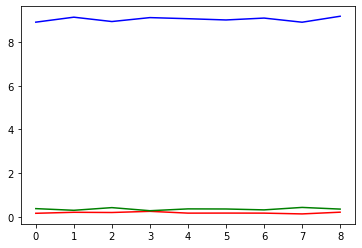

msg(g521,event,rasp,none,g521(accel,0.201112939453,0.387860668945,9.08838950195),10) msgnum= 10


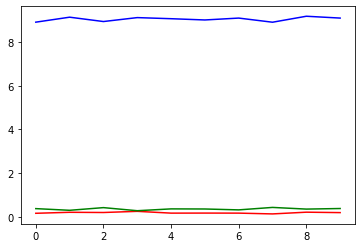

msg(g521,event,rasp,none,g521(accel,0.196324536133,0.395043273926,9.02135185547),11) msgnum= 11


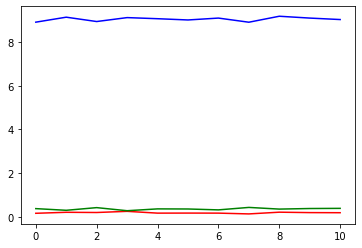

msg(g521,event,rasp,none,g521(accel,0.167594116211,0.339976635742,9.17697496338),12) msgnum= 12


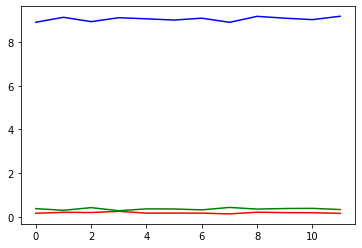

msg(g521,event,rasp,none,g521(accel,0.196324536133,0.411802685547,9.06444748535),13) msgnum= 13


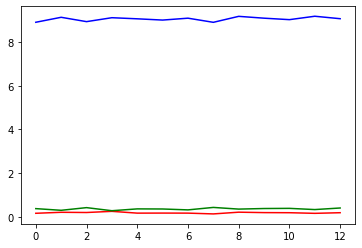

msg(g521,event,rasp,none,g521(accel,0.174776721191,0.414196887207,8.93037219238),14) msgnum= 14


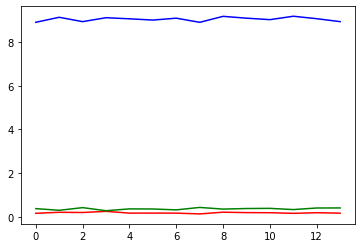

msg(g521,event,rasp,none,g521(accel,0.165199914551,0.339976635742,9.04768807373),15) msgnum= 15


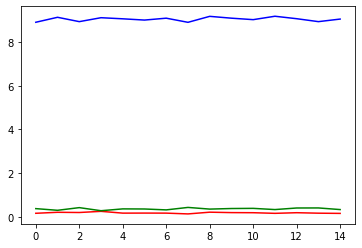

msg(g521,event,rasp,none,g521(accel,0.00718260498047,0.347159240723,8.90164177246),16) msgnum= 16


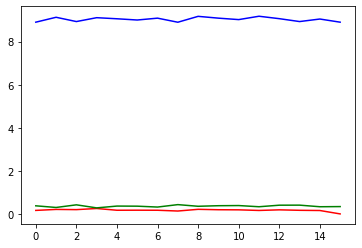

msg(g521,event,rasp,none,g521(accel,0.210689746094,0.320823022461,8.88967076416),17) msgnum= 17


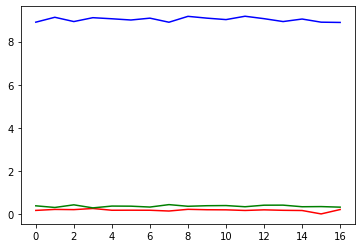

msg(g521,event,rasp,none,g521(accel,0.217872351074,0.354341845703,9.28950244141),18) msgnum= 18


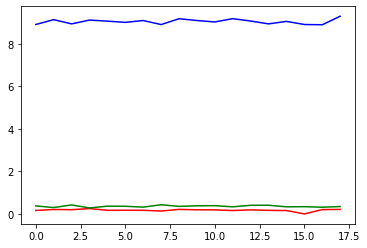

msg(g521,event,rasp,none,g521(accel,0.30406361084,0.328005627441,9.04289967041),19) msgnum= 19


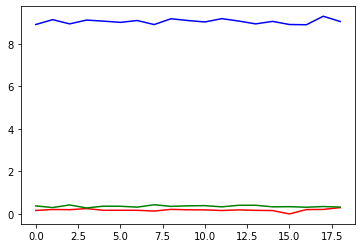

msg(g521,event,rasp,none,g521(accel,0.198718737793,0.373495458984,9.11711992188),20) msgnum= 20


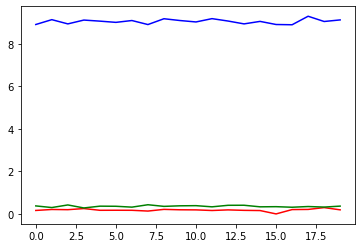

bye


In [31]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="localhost"
duration = 10
x        = []
y        = []
z        = []
goon     = True
msgnum   = 0 
def on_message(client, userdata, message) :   #define callback
	global msgnum, x,y,z, goon
	if not goon :
		return
	msgnum = msgnum + 1
	#msg(androidSensor,event,android,none,androidSensor(TYPE,X,Y,Z),MSGNUM)
	#msg(g521Sensor,event, gyroSender, none, g521Sensor(TYPE,X,Y,Z),MSGNUM)
	evMsg = str( message.payload.decode("utf-8")  )
	#print(evMsg, "msgnum=", msgnum )
	msgitems = evMsg.split(",")
	#if msgnum < 28 :
	x.append( float( msgitems[5] ) )
	y.append( float( msgitems[6] ) )
	vz = float( msgitems[7].split(')')[0] )
	z.append( vz )
	print(evMsg, "msgnum=", msgnum )
# if msgnum >= 22 :
#		print("DONE", "msgnum=", msgnum )
	plt.plot(list(x), color='red')
	plt.plot(list(y), color='green')
	plt.plot(list(z), color='blue')
	plt.show()
#		goon = False
		#client.disconnect()
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback
client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop    

In [30]:
x        = []
for i in range(1, 25) :
    x.append( i )
print( x  )   

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
